In [131]:
#Libraries Imports
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#Tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten,Conv2D , MaxPool2D 
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers.experimental.preprocessing import Normalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

In [132]:
#Extraction
from google.colab import drive
drive.mount("/content/gdrive")  
%cd "/content/gdrive/MyDrive/Colab Notebooks/Bloque2/Benjamin/Data"
np.set_printoptions(suppress=True) 

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/Colab Notebooks/Bloque2/Benjamin/Data


In [133]:
#Google Drive Dataset Access
dataset_directory = '/content/gdrive/MyDrive/Colab Notebooks/Bloque2/Benjamin/Data/archive (6)'
train_path = '/content/gdrive/MyDrive/Colab Notebooks/Bloque2/Benjamin/Data/archive (6)/Train' 

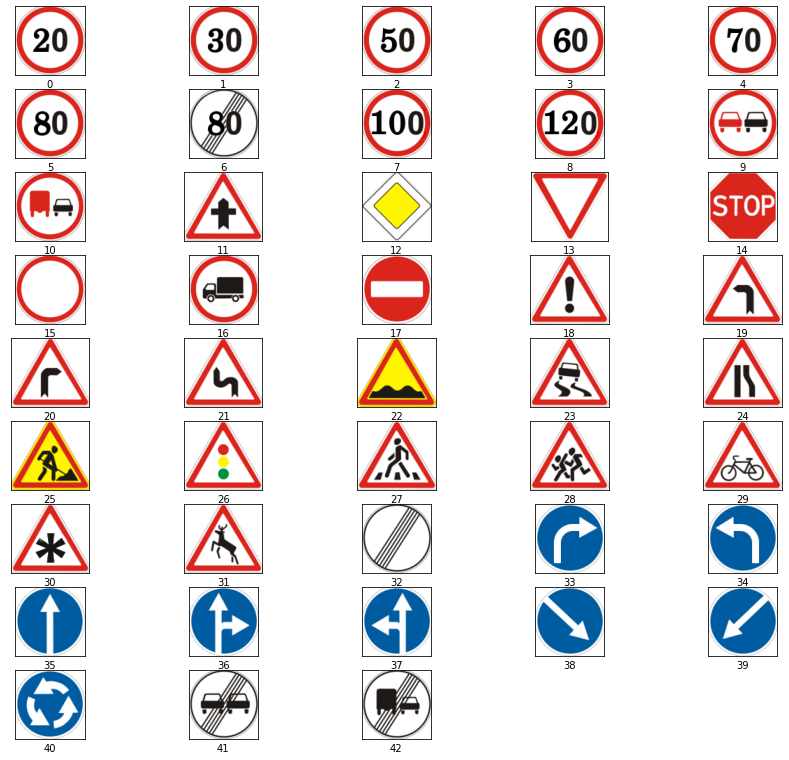

In [134]:
#Visualizing the data by accessing the Meta folder
plt.figure(figsize=(15, 15)) #Create plot spacing 
for i in range (0,43): #Plot 43 images of Meta folder
    plt.subplot(10,5,i+1) 
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    #Image path
    path = f'/content/gdrive/MyDrive/Colab Notebooks/Bloque2/Benjamin/Data/archive (6)/Meta/{i}.png'
    img = plt.imread(path) 
    plt.imshow(img) #Shows image
    plt.xlabel(i) #Shows the label associated to the image 

In [145]:
#Create image data list
image_data = []
#Create image labels list
image_labels = []

#Access all 43 folders inside Train data
for i in range(43):
    #Access images paths inside folders
    path = dataset_directory + '/Train/' + str(i)
    images = os.listdir(path)

    #Resize images
    for img in images:
      image = cv2.imread(path + '/' + img) #reads image into a numpy array
      image_f = Image.fromarray(image, 'RGB') #Convert to RGB colors
      size_image = image_f.resize((25, 25)) #Resize image into 25x25 format
      image_data.append(np.array(size_image)) #Append into image data
      image_labels.append(i)

#Convert both lists into numpy arrays
image_data = np.array(image_data)
image_labels = np.array(image_labels)
#print image sahpe
print(image_data.shape, image_labels.shape) 

(39209, 25, 25, 3) (39209,)


In [146]:
#shuffle index to prevent overfitting.
#This ensures that the batches are more representative
shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)
#Assign new possitions inside the arrays
image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes] 

In [147]:
#Split into training and validation
#The validation is like a pre test to prevent overfitting
X_train, X_val, y_train, y_val = train_test_split(image_data, 
                                                  image_labels, 
                                                  test_size=0.3, 
                                                  random_state=42, 
                                                  shuffle=True)

# Rescale the image values so that they lie in between 0 and 1
X_train = X_train/255 
X_val = X_val/255

#Print train and validation split results
print("X_train.shape", X_train.shape)
print("X_valid.shape", X_val.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_val.shape) 

X_train.shape (27446, 25, 25, 3)
X_valid.shape (11763, 25, 25, 3)
y_train.shape (27446,)
y_valid.shape (11763,)


In [148]:
#Define the 43 categories 
y_train = keras.utils.to_categorical(y_train, 43)
y_val = keras.utils.to_categorical(y_val, 43)

print(y_train.shape)
print(y_val.shape)

(27446, 43)
(11763, 43)


In [149]:
#Define the model 
modl = tf.keras.Sequential() #Model of stacked layers. Eeach layer has one input tensor and one output tensor.
modl.add(Conv2D(filters=32, kernel_size=(3,3), activation="relu", input_shape= X_train.shape[1:])) #Conv2D
modl.add(MaxPool2D(pool_size=(2,2))) #MaxPool2D
modl.add(Flatten()) #Flatten Layer 
modl.add(Dense(43, activation="sigmoid")) #Dense 

In [150]:
#Now we compile de model defining a loss function, an optimizer and the accuracy metrics to evaluate the model eficcience  
modl.compile(loss="categorical_crossentropy",
              optimizer='adam',
              metrics=['accuracy']) 

In [151]:
#Fit the model to the training data with a 64 batch and during 5 epochs 
history = modl.fit(X_train, y_train, batch_size=64, epochs=5, validation_data=(X_val, y_val)) 

Epoch 1/5
429/429 [==============================] - 3s 6ms/step - loss: 1.5286 - accuracy: 0.6250 - val_loss: 0.7156 - val_accuracy: 0.8254
Epoch 2/5
429/429 [==============================] - 4s 9ms/step - loss: 0.4731 - accuracy: 0.8989 - val_loss: 0.3791 - val_accuracy: 0.9184
Epoch 3/5
429/429 [==============================] - 4s 9ms/step - loss: 0.2747 - accuracy: 0.9462 - val_loss: 0.2491 - val_accuracy: 0.9509
Epoch 4/5
429/429 [==============================] - 2s 6ms/step - loss: 0.1914 - accuracy: 0.9627 - val_loss: 0.1918 - val_accuracy: 0.9613
Epoch 5/5
429/429 [==============================] - 2s 6ms/step - loss: 0.1380 - accuracy: 0.9751 - val_loss: 0.1752 - val_accuracy: 0.9568


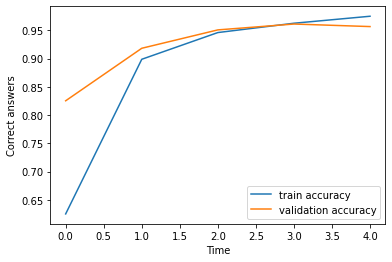

In [152]:
plt.plot(history.history['accuracy'],  
         label='train accuracy')
plt.plot(history.history['val_accuracy'], 
         label='validation accuracy')
plt.xlabel('Time')
plt.ylabel('Correct answers')
plt.legend()
plt.show() 

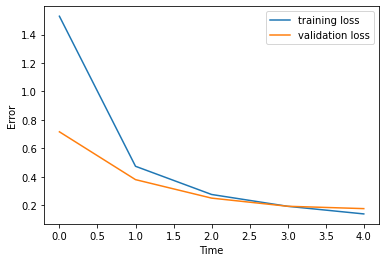

In [153]:
plt.plot(history.history['loss'],  
         label='training loss')
plt.plot(history.history['val_loss'], 
         label='validation loss')
plt.xlabel('Time')
plt.ylabel('Error')
plt.legend()
plt.show() 

In [154]:
#Define the model
modl2 = tf.keras.Sequential() #Model of stacked layers. Eeach layer has one input tensor and one output tensor.
modl2.add(Conv2D(filters=32, kernel_size=(7,7), activation="softmax", input_shape= X_train.shape[1:])) #Conv2D
modl2.add(MaxPool2D(pool_size=(2,2))) #MaxPool2D
modl2.add(Dropout(rate=0.3)) #Regularization Technique
modl2.add(Flatten()) #Flatten Layer 
modl2.add(Dense(300, activation="relu")) #Dense
modl2.add(Dense(43, activation="sigmoid")) #Dense 

In [155]:
#Now we compile de model defining a loss function, an optimizer and the accuracy metrics to evaluate the model eficcience  
modl2.compile(loss="categorical_crossentropy",
              optimizer='adam', 
              metrics=['accuracy'])

In [156]:
#Fit the model to the training data with a 64 batch and during 5 epochs 
history = modl2.fit(X_train, y_train, batch_size=64, epochs=5, validation_data=(X_val, y_val)) 

Epoch 1/5
429/429 [==============================] - 3s 6ms/step - loss: 2.5037 - accuracy: 0.3185 - val_loss: 1.3187 - val_accuracy: 0.6296
Epoch 2/5
429/429 [==============================] - 3s 6ms/step - loss: 1.0773 - accuracy: 0.6792 - val_loss: 0.6991 - val_accuracy: 0.8191
Epoch 3/5
429/429 [==============================] - 3s 6ms/step - loss: 0.7076 - accuracy: 0.7836 - val_loss: 0.4905 - val_accuracy: 0.8717
Epoch 4/5
429/429 [==============================] - 3s 6ms/step - loss: 0.5400 - accuracy: 0.8390 - val_loss: 0.3502 - val_accuracy: 0.9184
Epoch 5/5
429/429 [==============================] - 3s 7ms/step - loss: 0.4395 - accuracy: 0.8672 - val_loss: 0.2853 - val_accuracy: 0.9331


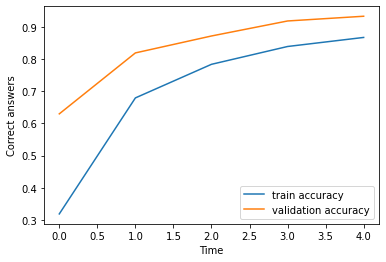

In [157]:
plt.plot(history.history['accuracy'], 
         label='train accuracy')
plt.plot(history.history['val_accuracy'], 
         label='validation accuracy')
plt.xlabel('Time')
plt.ylabel('Correct answers')
plt.legend() 
plt.show()

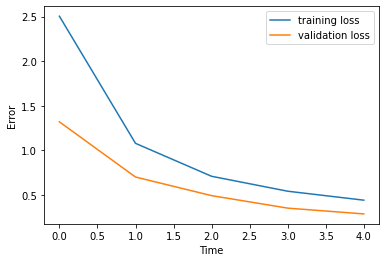

In [158]:
plt.plot(history.history['loss'], 
         label='training loss')
plt.plot(history.history['val_loss'], 
         label='validation loss')
plt.xlabel('Time')
plt.ylabel('Error')
plt.legend() 
plt.show()

In [159]:
# Define the labels 
classes = { 0:'20km/h Speed limit',
            1:'30km/h Speed limit', 
            2:'50km/h Speed limit', 
            3:'60km/h Speed limit', 
            4:'70km/h Speed limit', 
            5:'80km/h Speed limit', 
            6:'80km/h End of speed limit', 
            7:'100km/h Speed limit', 
            8:'120km/h Speed limit', 
            9:'No overtaking', 
            10:'No overtaking heavy traffic', 
            11:'Intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles allowed', 
            16:'Heavy traffic', 
            17:'No entry', 
            18:'Caution', 
            19:'Curve left', 
            20:'Curve right', 
            21:'Double curve', 
            22:'Rough road', 
            23:'Slippery', 
            24:'Road narrows right', 
            25:'Road work', 
            26:'Traffic sign', 
            27:'Pedestrian crossing', 
            28:'School crossing', 
            29:'Bicycle crossing', 
            30:'Ice road',
            31:'Animal crossing', 
            32:'End of speed limits', 
            33:'Turn right', 
            34:'Turn left', 
            35:'Go ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout', 
            41:'End of no overtaking', 
            42:'End of no overtaking heavy traffic' }

In [160]:
#Read csv labels
test = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Bloque2/Benjamin/Data/archive (6)/Test.csv')
#The class ID contains the labels
labels = test["ClassId"].values
#The Paths contain the location of the image
imgs = test["Path"].values
#Create a list 
data =[]

#Resize and RGB filter to test images 
for img in imgs:
      image = cv2.imread(dataset_directory + '/' +img)
      image_fromarray = Image.fromarray(image, 'RGB')
      resize_image = image_fromarray.resize((25, 25))
      data.append(np.array(resize_image))
#Convert to np array
X_test = np.array(data)
# Rescale the image values so that they lie in between 0 and 1
X_test = X_test/255



In [161]:
#Calculate prediction accuracy with model2 test
predict_x=modl2.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)
print('Test accuracy: ',accuracy_score(labels, classes_x)*100)

395/395 [==============================] - 1s 2ms/step
Test accuracy:  83.40459224069676


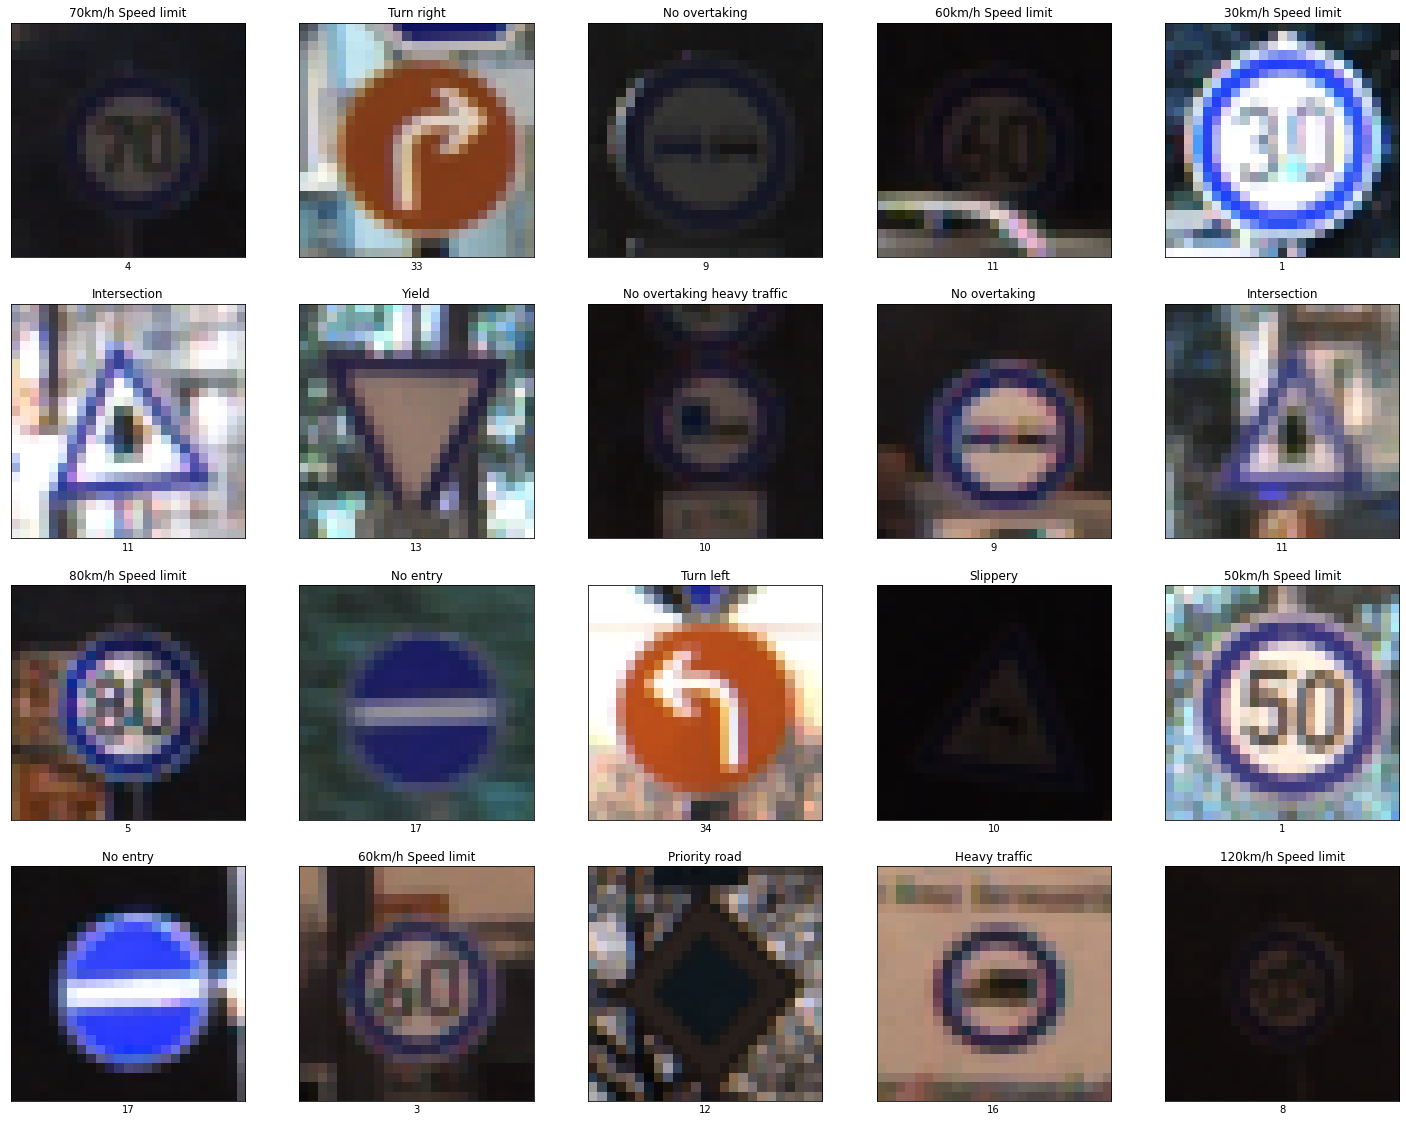

In [162]:
#Plotting test results
plt.figure(figsize = (25, 25))
start_index = 0
position = 1 #subploting iterator
#Analizing from image 20 to image 40
for i in range(20,40):
    plt.subplot(5, 5, position)
    position = position + 1 #simple iterator for subploting
    plt.grid(False) #Turn grid print off
    plt.xticks([])
    plt.yticks([])
    prediction = classes_x[start_index + i] #get prediction number
    actual = labels[start_index + i] #get actual label
    plt.xlabel(prediction)#print prediction number
    plt.title(classes[labels[i]]) #get prediction label
    plt.imshow(X_test[start_index + i]) #print image
plt.show()

In [163]:
mytest = '/content/gdrive/MyDrive/Colab Notebooks/Bloque2/Benjamin/Data/archive (6)/MyTest' 

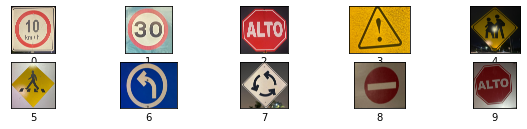

In [164]:
#Visualizing the data by accessing the Meta folder
plt.figure(figsize=(10, 10)) #Create plot spacing 
for i in range (0,10): #Plot 43 images of Meta folder
    plt.subplot(10,5,i+1) 
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    #Image path
    path = f'/content/gdrive/MyDrive/Colab Notebooks/Bloque2/Benjamin/Data/archive (6)/MyTest/{i}.png'
    img = plt.imread(path) 
    plt.imshow(img) #Shows image
    plt.xlabel(i) #Shows the label associated to the image 

In [165]:
#Create image data list
img_data = []
#Create image labels list
#Access all 43 folders inside Train data
for i in range(10):
      image = cv2.imread(f'/content/gdrive/MyDrive/Colab Notebooks/Bloque2/Benjamin/Data/archive (6)/MyTest/{i}.png') #reads image into a numpy array
      image_f = Image.fromarray(image, 'RGB')
      size_image = image_f.resize((25, 25)) #Resize image into 25x25 format
      img_data.append(np.array(size_image)) #Append into image data
#Convert to np array
my_test = np.array(img_data)
# Rescale the image values so that they lie in between 0 and 1 

In [166]:
#Calculate prediction accuracy with model2 test
predict_my_test=modl2.predict(my_test) 
#print('Test accuracy: ',accuracy_score(labels, classes_x)*100) 

1/1 [==============================] - 0s 67ms/step


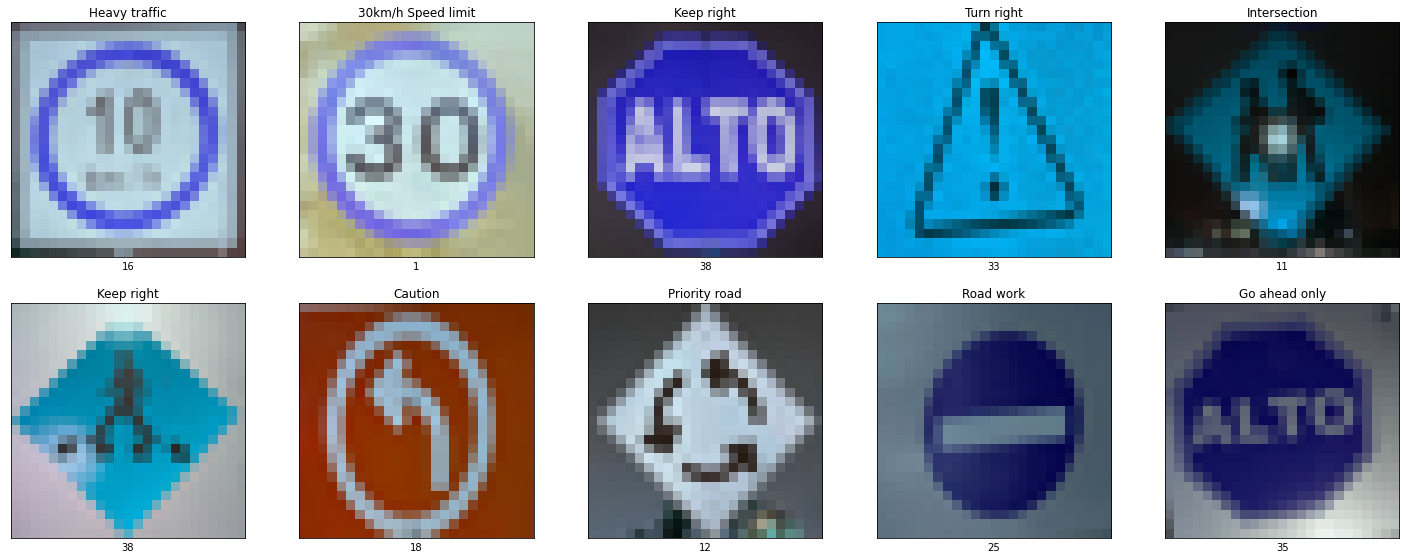

In [167]:
#Plotting test results
plt.figure(figsize = (25, 25))
start_index = 0
position = 1 #subploting iterator
#Analizing from image 20 to image 40
for i in range(0,10):
    plt.subplot(5, 5, position)
    position = position + 1 #simple iterator for subploting
    plt.grid(False) #Turn grid print off
    plt.xticks([])
    plt.yticks([])
    prediction = classes_x[start_index + i] #get prediction number
    plt.xlabel(prediction)#print prediction number
    plt.title(classes[prediction]) #get prediction label
    plt.imshow(my_test[start_index + i]) #print image 
plt.show()